In [1]:
# Importing Fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# sklearn modules for data preprocesing and model validation

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# ML Libraries
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
# Reading csv data file and storing into Dataframe
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# making a copy of original data
df=data.copy()


In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Basic data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Checking null value count
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Basic EDA

In [ ]:
# Five point summary of numerical data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Creating list of object type columns

col_obj=list(data.select_dtypes('object'))


# Alternate way 
  # col_obj=[]
  # for col in data.columns:
  #   if data[col].dtype=='object':
  #     col_obj.append(col)




In [ ]:
# checking count of each categorical feature
for i in col_obj:
  print(f'=============={i}=============\n')
  print(data[i].value_counts().sort_values(ascending=False))


==============Attrition=============

No     1233
Yes     237
Name: Attrition, dtype: int64
==============BusinessTravel=============

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
==============Department=============

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
==============EducationField=============

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
==============Gender=============

Male      882
Female    588
Name: Gender, dtype: int64
==============JobRole=============

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Dire

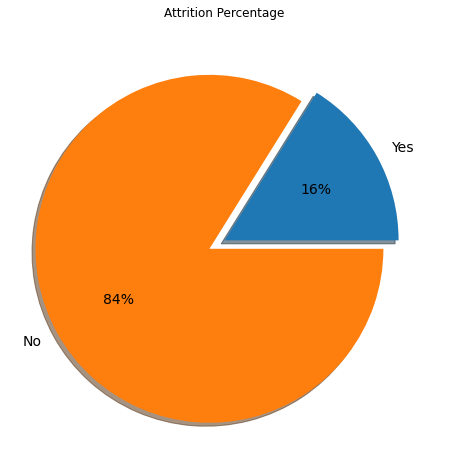

In [ ]:
# What's the current attrition percentage according to the dataset
plt.figure(figsize=(10,8))
plt.title('Attrition Percentage')
plt.pie(data['Attrition'].value_counts(ascending=True), labels=data['Attrition'].unique(),autopct='%.0f%%',explode=[0,0.1],shadow = True, textprops={'fontsize': 14})
plt.show()

In [ ]:
# Droping 4 columns which are not contributing any useful information for further analysis
drop_col=['EmployeeCount','EmployeeNumber','Over18','StandardHours']
data.drop(columns=drop_col,inplace=True)


In [ ]:
# Checking unique data of all fetures 

for col in data.columns:
  print(f'++++++++++++++ {col} +++++++++++++++')
  print(data[col].dtype)
  print(data[col].unique())
  print('='*20)

++++++++++++++ Age +++++++++++++++
int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
++++++++++++++ Attrition +++++++++++++++
object
['Yes' 'No']
++++++++++++++ BusinessTravel +++++++++++++++
object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
++++++++++++++ DailyRate +++++++++++++++
int64
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  

In [7]:
# Seperating featuers based on uniques values/types
list_num = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
              'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
              'YearsSinceLastPromotion', 'YearsWithCurrManager']
list_binary = ['Gender', 'OverTime']
list_cat = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
list_ord = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

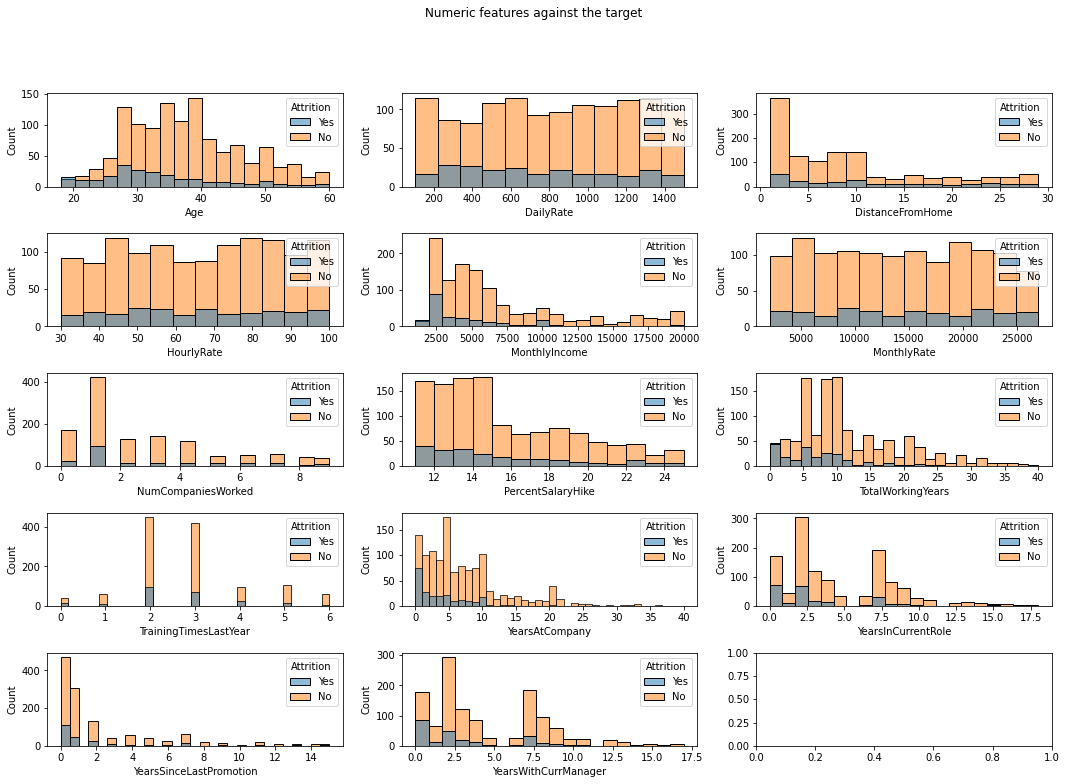

In [10]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(18,12))
fig.subplots_adjust(hspace=.5)
fig.suptitle('Numeric features against the target')
for col,ax in zip(list_num, axes.flatten()):
  sns.histplot(data=data,x=col,hue='Attrition',ax=ax)

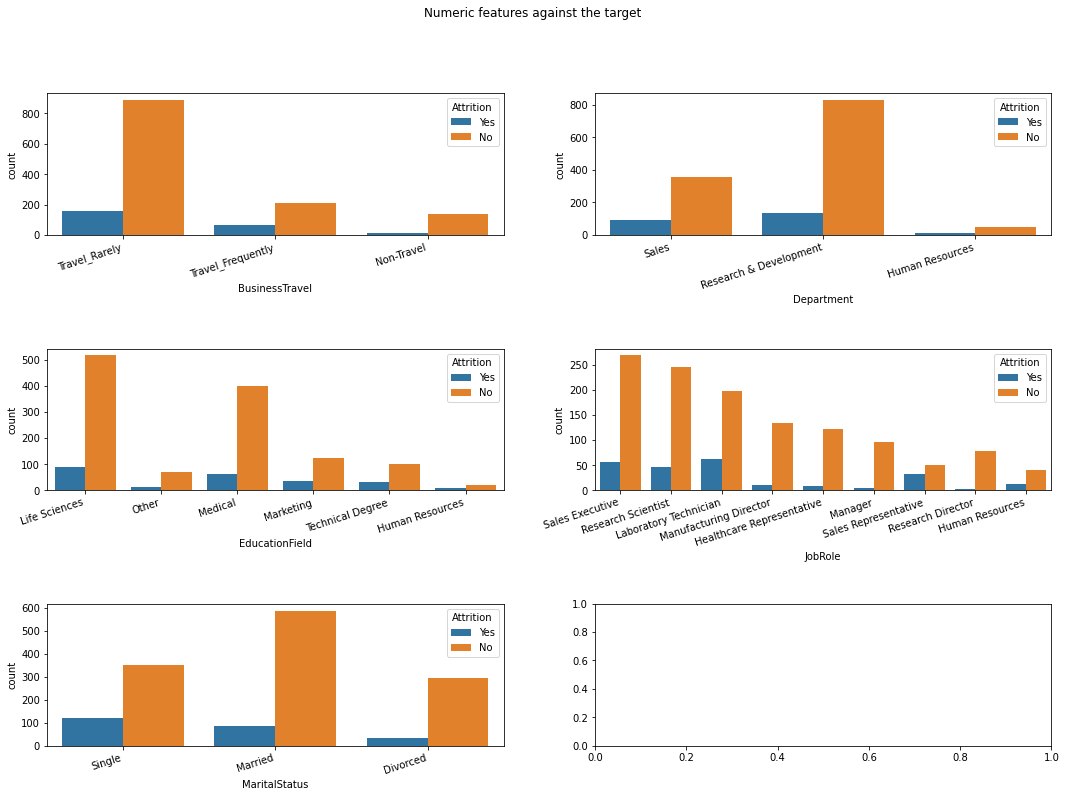

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(18,12))
fig.subplots_adjust(hspace=.8)
fig.suptitle('Numeric features against the target')
for col,ax in zip(list_cat, axes.flatten()):
   sns.countplot(data=data,x=col,hue='Attrition',ax=ax)
   ax.set_xticklabels(ax.get_xticklabels(),rotation=18,horizontalalignment='right')

In [ ]:
# checking datatypes and unique values of ordinal features 
  # for col in list_ord:
  #   print(f'++++++++++++++ {col} +++++++++++++++')
  #   print(data[col].dtype)
  #   print(data[col].unique())
  #   print('='*20)

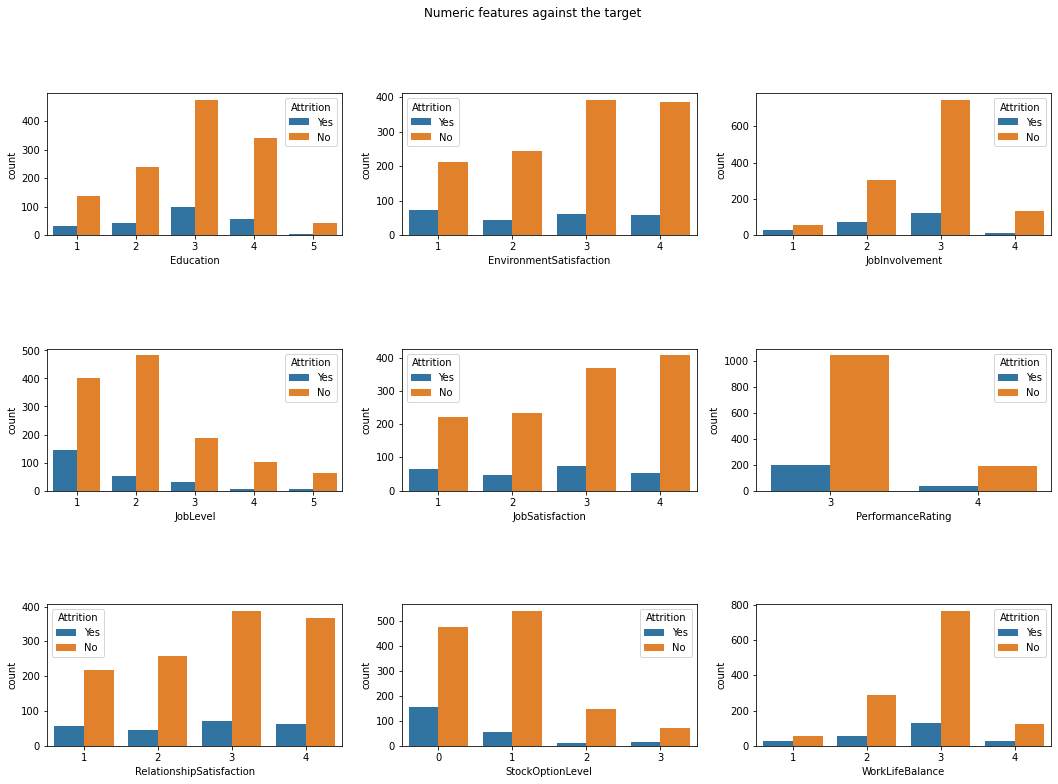

In [ ]:
# plotting all ordinal fetures data to check the effect on Attrition
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(18,12))
fig.subplots_adjust(hspace=.8)
fig.suptitle('Numeric features against the target')
for col,ax in zip(list_ord, axes.flatten()):
   sns.countplot(data=data,x=col,hue='Attrition',ax=ax)
   #ax.set_xticklabels(ax.get_xticklabels(),rotation=18,horizontalalignment='right')

# Model Building to predict attrition

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# converting target categorical variable into numeric
data['Attrition']=data.Attrition.replace({'Yes':1,'No':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
# Creating list of object type columns to perform onehotencoding

col_obj=list(data.select_dtypes('object'))

In [ ]:
# Converting categorical data into numerical data
data=pd.get_dummies(data,columns=col_obj,drop_first=True)


In [ ]:
# Separating features and target variable
X=data.drop(columns='Attrition').values
y=data['Attrition']

In [ ]:
# Splitting data into train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [ ]:
# Standardizing the data
std_scale=StandardScaler()
X_train=std_scale.fit_transform(X_train)
X_test=std_scale.transform(X_test)


In [ ]:
# Dictionary of Ml algorithm
model_dict={'adaboost' : AdaBoostClassifier(),
            'randomforest' : RandomForestClassifier(),
            'gradientboosting' : GradientBoostingClassifier(),
            'xgboost'  : XGBClassifier()}

In [ ]:
# Function to produce ML classification report
# def select_model(model_class):
#   print(f'\n++++++ Model Evaluation metrics for {model_class} +++++++++\n')
#   model=model_class
#   model.fit(X_train,y_train)
#   y_pred=model.predict(X_test)
#   print('Accuracy Score : %.1f%%\n' %(accuracy_score(y_test,y_pred)*100))
#   print('Precision Score : %.1f%%\n' %(precision_score(y_test,y_pred)*100))
#   print('Recall Score : %.1f%%\n' %(recall_score(y_test,y_pred)*100))
#   print('F1 Score : %.1f%%\n' %(f1_score(y_test,y_pred)*100))
#   conf=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True[0]','True[1]'],columns=['pred[0]','pred[1]'])
#   print(conf)
#   print('= ='*20)

In [ ]:
def select_model(model_class):
  print(f'\n++++++ Model Evaluation metrics for {model_class} +++++++++\n')
  model=model_class
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('Accuracy Score : %.1f%%\n' %(accuracy_score(y_test,y_pred)*100))
  print('Precision Score : %.1f%%\n' %(precision_score(y_test,y_pred)*100))
  print('Recall Score : %.1f%%\n' %(recall_score(y_test,y_pred)*100))
  print('F1 Score : %.1f%%\n' %(f1_score(y_test,y_pred)*100))
  confusion_matrix_model = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(12,8))
  ax = plt.subplot()
  sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  ax.set_title(f'Confusion Matrix - {model_class}')
  ax.xaxis.set_ticklabels(['0','1'])
  ax.yaxis.set_ticklabels(['0','1'])


++++++ Model Evaluation metrics for AdaBoostClassifier() +++++++++

Accuracy Score : 85.9%

Precision Score : 44.4%

Recall Score : 33.3%

F1 Score : 38.1%


++++++ Model Evaluation metrics for RandomForestClassifier() +++++++++

Accuracy Score : 87.2%

Precision Score : 57.1%

Recall Score : 8.3%

F1 Score : 14.5%


++++++ Model Evaluation metrics for GradientBoostingClassifier() +++++++++

Accuracy Score : 88.3%

Precision Score : 61.9%

Recall Score : 27.1%

F1 Score : 37.7%


++++++ Model Evaluation metrics for XGBClassifier() +++++++++

Accuracy Score : 88.6%

Precision Score : 66.7%

Recall Score : 25.0%

F1 Score : 36.4%



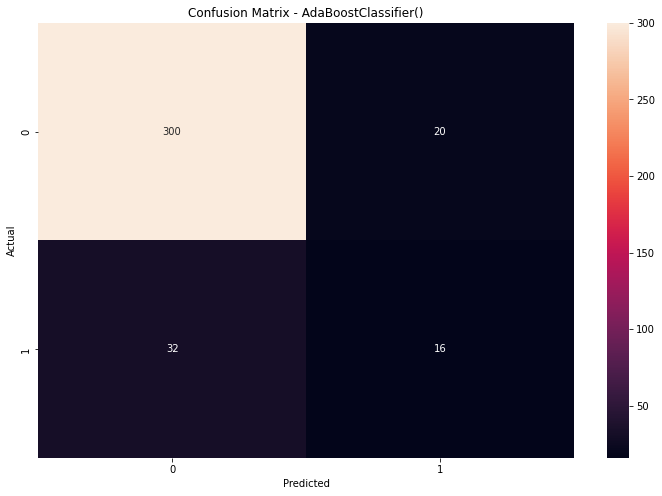

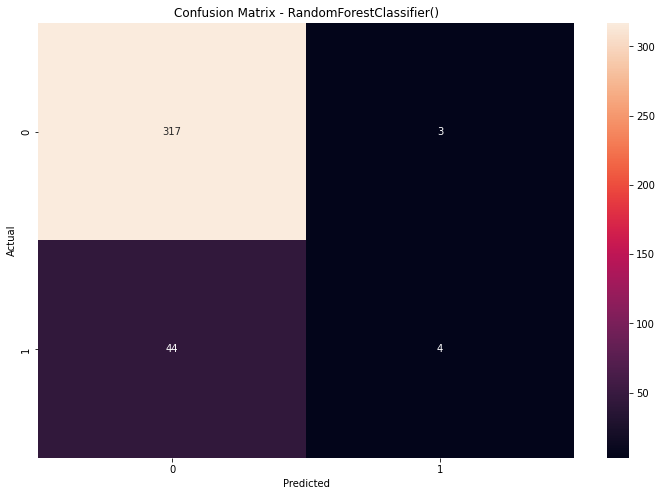

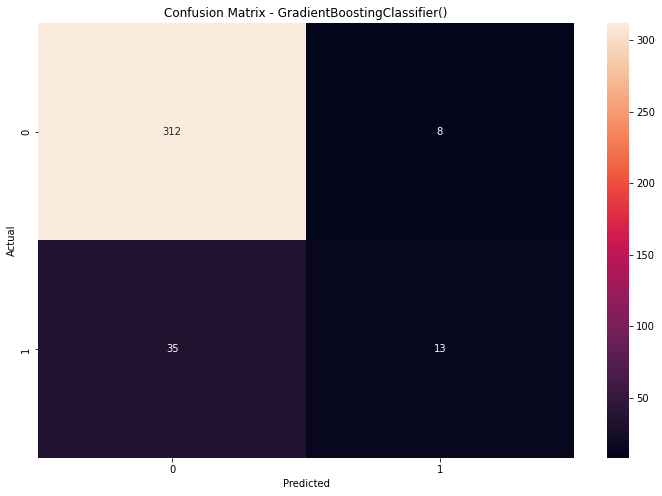

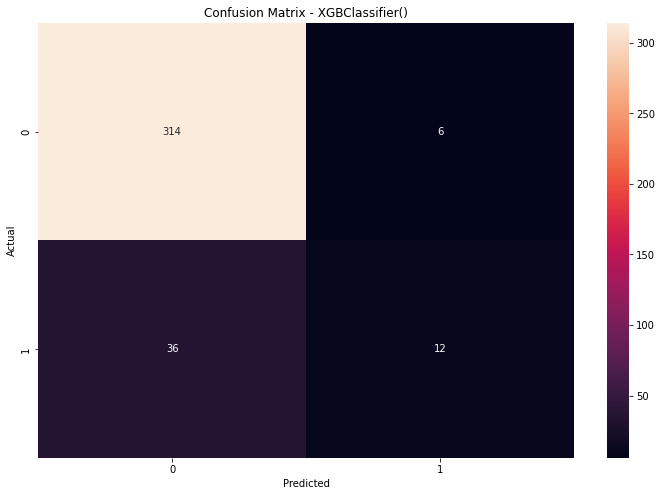

In [ ]:
for k,v in model_dict.items():
  select_model(v)


After evaluation of all ML participated algorithm accuracy score and other parameters XGBClassifier produces satisfactory score. 

Just need to check with applying oversampling method "SMOTE" as there is a difference in target variable ratio.
Also Model can be optimized through hyperparameter tunning

In [ ]:
# After evaluation of all ML participated algorithm accuracy score and other parameters XGBClassifier produces satisfactory score. 

# Just need to check with applying oversampling method "SMOTE" as there is a difference in target variable ratio.
# Also Model can be optimized through hyperparameter tunning